In [ ]:
import pandas as pd

# 데이터 불러오기
file_path = "./review_tokenized.csv"  # 업로드한 파일 경로
df = pd.read_csv(file_path)

# 데이터 개수 및 컬럼 확인
print("데이터 개수:", len(df))
print("컬럼 정보:\n", df.info())
print("\n데이터 샘플:\n", df.head())


데이터 개수: 559463
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559463 entries, 0 to 559462
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         559463 non-null  int64  
 1   product_id        559463 non-null  int64  
 2   rating            559463 non-null  float64
 3   review_text       559463 non-null  object 
 4   review_date       559463 non-null  object 
 5   review_size       559463 non-null  object 
 6   review_length     559463 non-null  int64  
 7   cleaned_review    559253 non-null  object 
 8   tokenized_review  559463 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 38.4+ MB
컬럼 정보:
 None

데이터 샘플:
    review_id  product_id  rating  \
0   10000086     1417451     5.0   
1   10000110     1092992     5.0   
2   10000121     1092992     5.0   
3   10000123     1092992     4.0   
4   10000139     1092992     5.0   

                                         rev

In [ ]:
# 결측치 제거 (review_text가 없는 경우)
df = df.dropna(subset=["review_text"])

# 중복 제거 (review_id 기준으로 중복 제거)
df = df.drop_duplicates(subset=["review_id"])

print("결측치 및 중복 제거 후 데이터 개수:", len(df))

결측치 및 중복 제거 후 데이터 개수: 559463


In [ ]:
# 리뷰 길이 계산
df["review_length"] = df["review_text"].apply(lambda x: len(str(x)))

# 10자 미만, 500자 초과인 리뷰 제거
df = df[(df["review_length"] >= 10) & (df["review_length"] <= 500)]

print("리뷰 길이 필터링 후 데이터 개수:", len(df))

리뷰 길이 필터링 후 데이터 개수: 559463


In [ ]:
import re

# 불용어 리스트 정의
stopwords= set([
    "아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가", "으로", "로", "에게",
    "뿐이다", "의거하여", "근거하여", "입각하여", "기준으로", "예하면", "예를 들면", "예를 들자면", "저", "소인", "소생", "저희", "지말고",
    "하지마", "하지마라", "다른", "물론", "또한", "그리고", "비길수 없다", "해서는 안된다", "뿐만 아니라", "만이 아니다", "만은 아니다", "막론하고",
    "관계없이", "그치지 않다", "그러나", "그런데", "하지만", "든간에", "논하지 않다", "따지지 않다", "설사", "비록", "더라도", "아니면", "만 못하다",
    "하는 편이 낫다", "불문하고", "향하여", "향해서", "향하다", "쪽으로", "틈타", "이용하여", "타다", "오르다", "제외하고", "이 외에", "이 밖에",
    "하여야", "비로소", "한다면 몰라도", "외에도", "이곳", "여기", "부터", "기점으로", "따라서", "할 생각이다", "하려고하다", "이리하여", "그리하여",
    "그렇게 함으로써", "하지만", "일때", "할때", "앞에서", "중에서", "보는데서", "으로써", "로써", "까지", "해야한다", "일것이다", "반드시",
    "할줄알다", "할수있다", "할수있어", "임에 틀림없다", "한다면", "등", "등등", "제", "겨우", "단지", "다만", "할뿐", "딩동", "댕그", "대해서",
    "대하여", "대하면", "훨씬", "얼마나", "얼마만큼", "얼마큼", "남짓", "여", "얼마간", "약간", "다소", "좀", "조금", "다수", "몇", "얼마",
    "지만", "하물며", "또한", "그러나", "그렇지만", "하지만", "이외에도", "대해 말하자면", "뿐이다", "다음에", "반대로", "반대로 말하자면",
    "이와 반대로", "바꾸어서 말하면", "바꾸어서 한다면", "만약", "그렇지않으면", "까악", "툭", "딱", "삐걱거리다", "보드득", "비걱거리다", "꽈당",
    "응당", "해야한다", "에 가서", "각", "각각", "여러분", "각종", "각자", "제각기", "하도록하다", "와", "과", "그러므로", "그래서", "고로",
    "한 까닭에", "하기 때문에", "거니와", "이지만", "대하여", "관하여", "관한", "과연", "실로", "아니나다를가", "생각한대로", "진짜로", "한적이있다",
    "하곤하였다", "하", "하하", "허허", "아하", "거바", "와", "오", "왜", "어째서", "무엇때문에", "어찌", "하겠는가", "무슨", "어디", "어느곳",
    "더군다나", "하물며", "더욱이는", "어느때", "언제", "야", "이봐", "어이", "여보시오", "흐흐", "흥", "휴", "헉헉", "헐떡헐떡", "영차", "여차",
    "어기여차", "끙끙", "아야", "앗", "아야", "콸콸", "졸졸", "좍좍", "뚝뚝", "주룩주룩", "솨", "우르르", "그래도", "또", "그리고", "바꾸어말하면",
    "바꾸어말하자면", "혹은", "혹시", "답다", "및", "그에 따르는", "때가 되어", "즉", "지든지", "설령", "가령", "하더라도", "할지라도", "일지라도",
    "지든지", "몇", "거의", "하마터면", "인젠", "이젠", "된바에야", "된이상", "만큼", "어찌됏든", "그위에", "게다가", "점에서 보아", "비추어 보아",
    "고려하면", "하게될것이다", "일것이다", "비교적", "좀", "보다더", "비하면", "시키다", "하게하다", "할만하다", "의해서", "연이서", "이어서",
    "잇따라", "뒤따라", "뒤이어", "결국", "의지하여", "기대여", "통하여", "자마자", "더욱더", "불구하고", "얼마든지", "마음대로", "주저하지 않고",
    "곧", "즉시", "바로", "당장", "하자마자", "밖에 안된다", "하면된다", "그래", "그렇지", "요컨대", "다시 말하자면", "바꿔 말하면", "즉", "구체적으로",
    '너무', 'ㅎㅎ', 'ㅎㅎㅎ', 'ㅋㅋ', '좋아요', '예뻐요', '이뻐요', '진짜', '정말', '예쁘고', '이쁘고', '맘에','들어요', '완전', '좋고', '생각보다', '같아요', '마음에', 'ㅜㅜ', 'ㅜㅜㅜ'
    '조금', '엄청', '아주', '좋습니다', '좋네요', '생각', '예쁘', 'ㅠㅠ', 'ㅠㅠㅠ', 'ㅋㅋㅋ'
])

# 텍스트 정제 함수
def clean_text(text):
    text = str(text)

    # ㅋㅋㅋ, ㅎㅎㅎ, ㅠㅠㅠ 같은 감탄사 제거
    text = re.sub(r"ㅋ{2,}|ㅎ{2,}|ㅠ{2,}|ㅜ{2,}", "", text)

    # 한글 및 공백만 남기고 제거
    text = re.sub(r"[^가-힣\s]", "", text)

    # 불용어 제거
    words = text.split()
    words = [word for word in words if word not in stopwords]

    # 정제된 단어들을 다시 합침
    text = " ".join(words)

    # 공백 정리
    text = re.sub(r"\s+", " ", text).strip()

    return text

# 모든 리뷰에 적용
df["cleaned_review"] = df["review_text"].apply(clean_text)

# 정제된 데이터 샘플 확인
print("텍스트 정제 완료! 예시:\n", df[["review_text", "cleaned_review"]].head())


텍스트 정제 완료! 예시:
                                          review_text  \
0  270~275인데 젤큰사이즈 클까봐 걱정했는데 완전 뙇맞음 쿠션감 너무 좋구요 블랙...   
1  너무 편하다고 얘기듣고 샀는데 진짜 편하네요 만족합니다 다만 재질상 땀이 나면 어떨...   
2                     커플로 주문했습니다 급하게 나갈때는 이거만 신네요 ㅋㅋ   
3                          너무 푹신해서 다리가 조금 불편하기도 합니다요   
4             발이너무 편해요 발등부분이 좀만더 타이트했으면 좋았겠어요~ 살짝헐렁임   

                                   cleaned_review  
0       인데 젤큰사이즈 클까봐 걱정했는데 뙇맞음 쿠션감 좋구요 블랙슬렉스에 이쁠거  
1  편하다고 얘기듣고 샀는데 편하네요 만족합니다 재질상 땀이 나면 어떨지 신어봐야겠네요  
2                     커플로 주문했습니다 급하게 나갈때는 이거만 신네요  
3                             푹신해서 다리가 불편하기도 합니다요  
4           발이너무 편해요 발등부분이 좀만더 타이트했으면 좋았겠어요 살짝헐렁임  


In [ ]:
processed_file_path = "./review_processed.csv"
df.to_csv(processed_file_path, index=False)
print(f"텍스트 정제 완료! 저장된 파일: {processed_file_path}")

텍스트 정제 완료! 저장된 파일: ./review_processed.csv


데이터프레임 크기: (559463, 9)

컬럼별 결측값 개수:
 review_id             0
product_id            0
rating                0
review_text           0
review_date           0
review_size           0
review_length         0
cleaned_review      252
tokenized_review      0
dtype: int64

데이터 타입 확인:
 review_id             int64
product_id            int64
rating              float64
review_text          object
review_date          object
review_size          object
review_length         int64
cleaned_review       object
tokenized_review     object
dtype: object

리뷰 길이 통계값:
count    559463.000000
mean          9.604401
std           5.828736
min           1.000000
25%           6.000000
50%           8.000000
75%          11.000000
max          53.000000
Name: review_length, dtype: float64


/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:

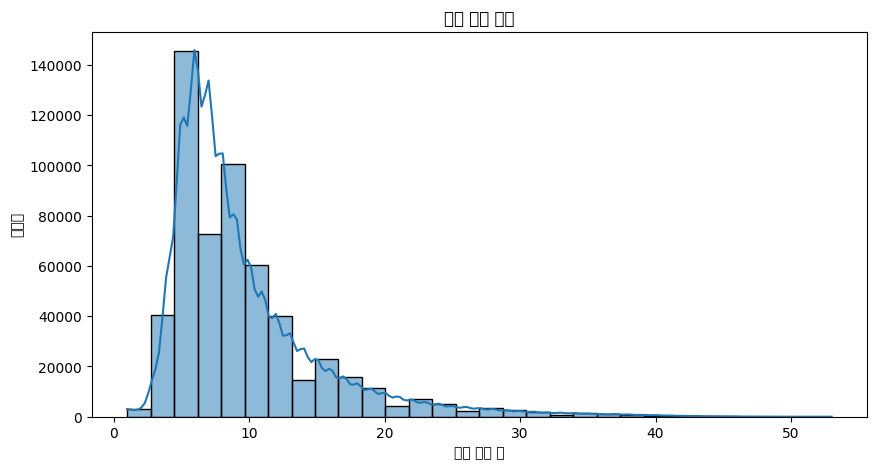


가장 많이 등장하는 단어 50개:
 [('잘', 87569), ('편하고', 43636), ('신고', 40179), ('사이즈', 38476), ('것', 36363), ('신는데', 32363), ('신발', 29464), ('발이', 24095), ('편해요', 23739), ('더', 21237), ('샀는데', 20639), ('많이', 19456), ('편하게', 17289), ('가성비', 17169), ('발', 16869), ('발볼이', 16866), ('좋은', 16545), ('살짝', 16537), ('사이즈는', 16399), ('신을', 16363), ('만족합니다', 16356), ('다', 16340), ('신기', 16193), ('처음', 15901), ('크게', 15590), ('수', 15380), ('평소', 15250), ('같습니다', 14957), ('이', 14701), ('있어서', 14055), ('정사이즈', 13920), ('착화감', 13860), ('거', 13654), ('착화감도', 13548), ('근데', 13466), ('신으면', 13293), ('역시', 13005), ('신발이', 12887), ('사이즈가', 12758), ('사이즈도', 12714), ('편해서', 12636), ('때', 12545), ('그냥', 12357), ('발볼', 12267), ('자주', 12047), ('오래', 11793), ('디자인도', 11379), ('가볍고', 11163), ('편합니다', 11131), ('우포스', 10909)]


/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.

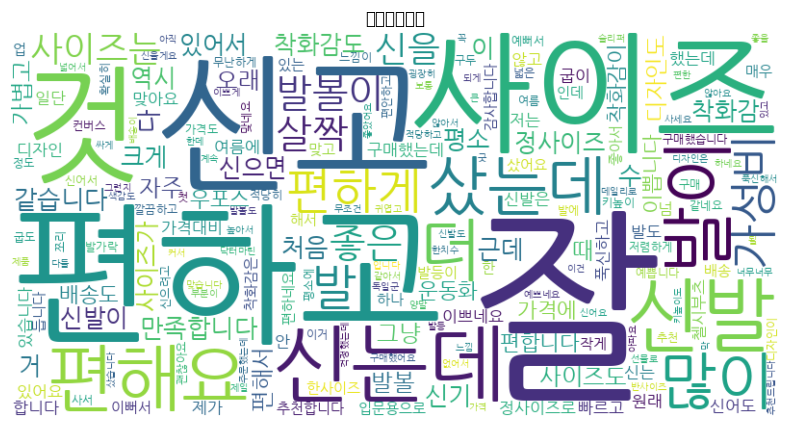

/tmp/ipykernel_38224/1618439853.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="rating", palette="coolwarm")
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/l

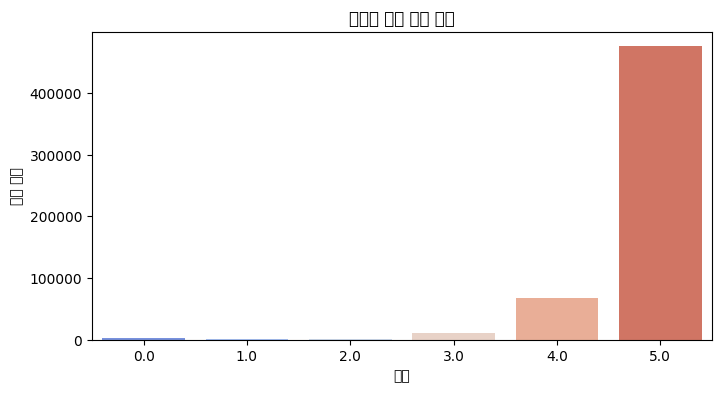

/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py

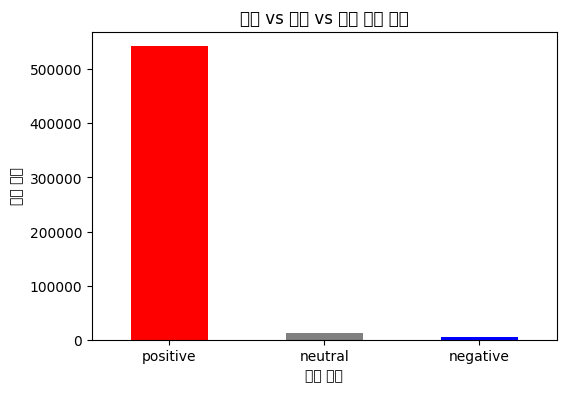

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# 데이터 로드
df = pd.read_csv("./review_processed.csv")

### 1. 데이터 기본 정보 확인 ###
print("데이터프레임 크기:", df.shape)
print("\n컬럼별 결측값 개수:\n", df.isnull().sum())
print("\n데이터 타입 확인:\n", df.dtypes)

### 2. 텍스트 길이 분석 ###
df["review_length"] = df["cleaned_review"].astype(str).apply(lambda x: len(x.split()))  # 단어 개수

# 리뷰 길이의 기본 통계값 출력
print("\n리뷰 길이 통계값:")
print(df["review_length"].describe())

# 리뷰 길이 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 5))
sns.histplot(df["review_length"], bins=30, kde=True)
plt.xlabel("리뷰 단어 수")
plt.ylabel("빈도수")
plt.title("리뷰 길이 분포")
plt.show()

### 3. 빈도수 기반 키워드 분석 ###
# 모든 단어 리스트 만들기
words = " ".join(df["cleaned_review"].astype(str)).split()
word_counts = Counter(words)

# 가장 많이 등장하는 단어 50개 추출
common_words = word_counts.most_common(50)
print("\n가장 많이 등장하는 단어 50개:\n", common_words)

# 워드클라우드 시각화
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color="white", width=800, height=400).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("워드클라우드")
plt.show()

### 4. 감성 분석을 위한 데이터 분포 확인 ###
if "rating" in df.columns:
    # 평점이 있는 경우 감성 분포 확인
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x="rating", palette="coolwarm")
    plt.xlabel("평점")
    plt.ylabel("리뷰 개수")
    plt.title("평점별 리뷰 개수 분포")
    plt.show()

    # 긍정(4~5점) vs 부정(1~2점) 분포
    df["sentiment"] = df["rating"].apply(lambda x: "positive" if x >= 4 else ("negative" if x <= 2 else "neutral"))
    sentiment_counts = df["sentiment"].value_counts()

    plt.figure(figsize=(6, 4))
    sentiment_counts.plot(kind="bar", color=["red", "gray", "blue"])
    plt.xlabel("감성 분류")
    plt.ylabel("리뷰 개수")
    plt.title("긍정 vs 부정 vs 중립 리뷰 분포")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("\n'Rating' 컬럼이 없어 감성 분석을 수행할 수 없습니다.")


/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py

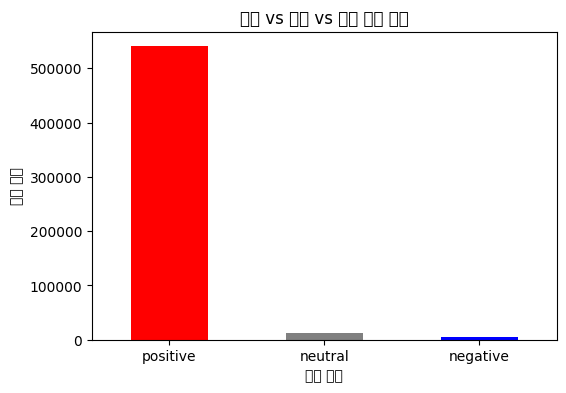

In [ ]:
# 1. 결측값 처리 (cleaned_review)
df = df.dropna(subset=["cleaned_review"])  # 결측값 제거

# 2. 너무 짧은 리뷰 제거 (단어 2개 미만)
df = df[df["review_length"] >= 2]

# 3. 상위 불필요한 단어 제거
stopwords.update(["잘", "것", "더", "다", "수"])  # 불필요한 단어 추가 제거

# 4. 감성 분석 분포 확인 (긍/부정 비율)
import seaborn as sns
import matplotlib.pyplot as plt

df["sentiment"] = df["rating"].apply(lambda x: "positive" if x >= 4 else ("negative" if x <= 2 else "neutral"))
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["red", "gray", "blue"])
plt.xlabel("감성 분류")
plt.ylabel("리뷰 개수")
plt.title("긍정 vs 부정 vs 중립 리뷰 분포")
plt.xticks(rotation=0)
plt.show()


In [ ]:
df.head()

,review_id,product_id,rating,review_text,review_date,review_size,review_length,cleaned_review,tokenized_review,sentiment
0,10000086,1417451,5.0,270~275인데 젤큰사이즈 클까봐 걱정했는데 완전 뙇맞음 쿠션감 너무 좋구요 블랙...,2020-06-03,42 (275mm) 구매,9,인데 젤큰사이즈 클까봐 걱정했는데 뙇맞음 쿠션감 좋구요 블랙슬렉스에 이쁠거,"['인데', '사이즈', '클까봐', '걱정', '했는데', '뙇맞음', '쿠션',...",positive
1,10000110,1092992,5.0,너무 편하다고 얘기듣고 샀는데 진짜 편하네요 만족합니다 다만 재질상 땀이 나면 어떨...,2020-06-03,260 구매,10,편하다고 얘기듣고 샀는데 편하네요 만족합니다 재질상 땀이 나면 어떨지 신어봐야겠네요,"['편하다고', '얘기', '듣고', '샀는데', '편하네요', '만족합니다', '...",positive
2,10000121,1092992,5.0,커플로 주문했습니다 급하게 나갈때는 이거만 신네요 ㅋㅋ,2020-06-03,230 구매,6,커플로 주문했습니다 급하게 나갈때는 이거만 신네요,"['커플', '주문', '했습니다', '급하게', '나갈', '거만', '신네요']",positive
3,10000123,1092992,4.0,너무 푹신해서 다리가 조금 불편하기도 합니다요,2020-06-03,280 구매,4,푹신해서 다리가 불편하기도 합니다요,"['푹신해서', '다리', '불편하기도', '합니다요']",positive
4,10000139,1092992,5.0,발이너무 편해요 발등부분이 좀만더 타이트했으면 좋았겠어요~ 살짝헐렁임,2020-06-03,250 구매,7,발이너무 편해요 발등부분이 좀만더 타이트했으면 좋았겠어요 살짝헐렁임,"['너무', '편해요', '발등', '부분', '타이', '했으면', '좋았겠어요'...",positive


In [ ]:
# sentiment 컬럼 제거
if "sentiment" in df.columns:
    df = df.drop(columns=["sentiment"])

# 변경된 데이터 확인
print(df.head())
print("데이터프레임 크기:", df.shape)

   review_id  product_id  rating  \
0   10000086     1417451     5.0   
1   10000110     1092992     5.0   
2   10000121     1092992     5.0   
3   10000123     1092992     4.0   
4   10000139     1092992     5.0   

                                         review_text review_date  \
0  270~275인데 젤큰사이즈 클까봐 걱정했는데 완전 뙇맞음 쿠션감 너무 좋구요 블랙...  2020-06-03   
1  너무 편하다고 얘기듣고 샀는데 진짜 편하네요 만족합니다 다만 재질상 땀이 나면 어떨...  2020-06-03   
2                     커플로 주문했습니다 급하게 나갈때는 이거만 신네요 ㅋㅋ  2020-06-03   
3                          너무 푹신해서 다리가 조금 불편하기도 합니다요  2020-06-03   
4             발이너무 편해요 발등부분이 좀만더 타이트했으면 좋았겠어요~ 살짝헐렁임  2020-06-03   

     review_size  review_length  \
0  42 (275mm) 구매              9   
1         260 구매             10   
2         230 구매              6   
3         280 구매              4   
4         250 구매              7   

                                   cleaned_review  \
0       인데 젤큰사이즈 클까봐 걱정했는데 뙇맞음 쿠션감 좋구요 블랙슬렉스에 이쁠거   
1  편하다고 얘기듣고 샀는데 편하네요 만족합니다 재질상 땀이 나면 어떨지 신어봐야겠네요   
2   

rating
5.0    473808
4.0     66653
3.0     11610
0.0      2200
1.0      1754
2.0      1698
Name: count, dtype: int64


/tmp/ipykernel_38224/3207812556.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pyto

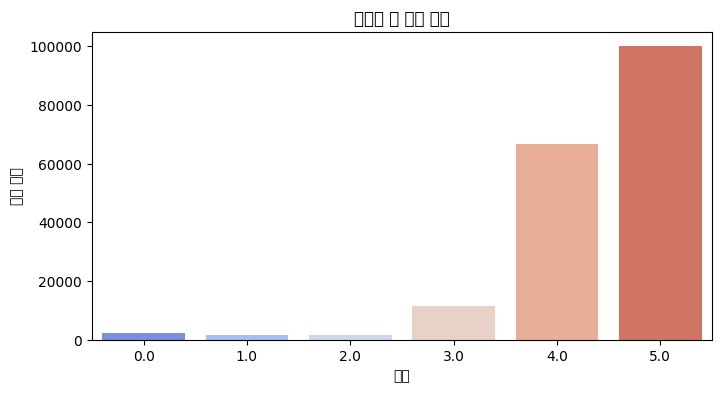

샘플링 후 데이터 크기: (183915, 9)


In [ ]:
import pandas as pd

# 평점별 개수 확인
print(df["rating"].value_counts())

# 5점 데이터 줄이기 (다운 샘플링)
df_5 = df[df["rating"] == 5].sample(n=100000, random_state=42)  # 10만 개만 유지

# 다른 평점 데이터 유지
df_rest = df[df["rating"] < 5]  # 5점 미만 데이터는 모두 유지

# 데이터 병합
df_balanced = pd.concat([df_5, df_rest])

# 새로운 평점 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
plt.xlabel("평점")
plt.ylabel("리뷰 개수")
plt.title("샘플링 후 평점 분포")
plt.show()

print("샘플링 후 데이터 크기:", df_balanced.shape)


In [ ]:
df_balanced.head()

,review_id,product_id,rating,review_text,review_date,review_size,review_length,cleaned_review,tokenized_review
227352,35535442,1128656,5.0,적당히 무게감이 있어서 코트같은거 입고 신기 좋네요,2022-11-22,블랙 · 280 구매,6,적당히 무게감이 있어서 코트같은거 입고 신기,"['적당히', '무게', '있어서', '코트', '같은거', '입고', '신기', ..."
237150,36768334,2737420,5.0,가격대비 나쁘지 않습니다 볼드한 더비 입문하시는분들에게 추천합니다,2022-12-12,250 구매,7,가격대비 나쁘지 않습니다 볼드한 더비 입문하시는분들에게 추천합니다,"['가격', '대비', '나쁘지', '않습니다', '볼드', '더비', '입문', ..."
474544,63926084,3485453,5.0,앞코에 주름이 조금 신경쓰이긴 하지만 바지로가리면 되서 극ㅂ뽁~,2024-08-18,42 (265-270) 구매,6,앞코에 주름이 신경쓰이긴 바지로가리면 되서 극뽁,"['앞코', '주름', '신경', '쓰이긴', '바지', '가리면', '되서', '..."
558360,9898012,1092992,5.0,일단 착화감이 너무 푹신푹신함에도 불구하고 모양이 많이 흐트려지지않아서 좋아요 다른...,2020-05-28,260 구매,12,일단 착화감이 푹신푹신함에도 모양이 많이 흐트려지지않아서 쪼리와는 다르게 튼튼해서 ...,"['푹신푹신', '에도', '불구', '하고', '모양', '많이', '흐트', '..."
427644,59219983,2330196,5.0,신발은 살짝 크게 나왔고요. 매우 푹신 합니다.\n그렇다고 무겁진 않아서 신기좋아요...,2024-05-11,(19)BLACK · 260 구매,18,신발은 살짝 크게 나왔고요 매우 푹신 합니다 그렇다고 무겁진 않아서 신기좋아요 비를...,"['신발', '크게', '나왔고요', '푹신', '합니다', '그렇다고', '무겁진..."


📌 데이터프레임 크기: (183915, 9)

📌 컬럼별 결측값 개수:
 review_id           0
product_id          0
rating              0
review_text         0
review_date         0
review_size         0
review_length       0
cleaned_review      0
tokenized_review    0
dtype: int64

📌 데이터 타입 확인:
 review_id             int64
product_id            int64
rating              float64
review_text          object
review_date          object
review_size          object
review_length         int64
cleaned_review       object
tokenized_review     object
dtype: object

📌 리뷰 길이 통계값:
count    183915.000000
mean         10.038393
std           6.133184
min           2.000000
25%           6.000000
50%           8.000000
75%          12.000000
max          52.000000
Name: review_length, dtype: float64


/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:

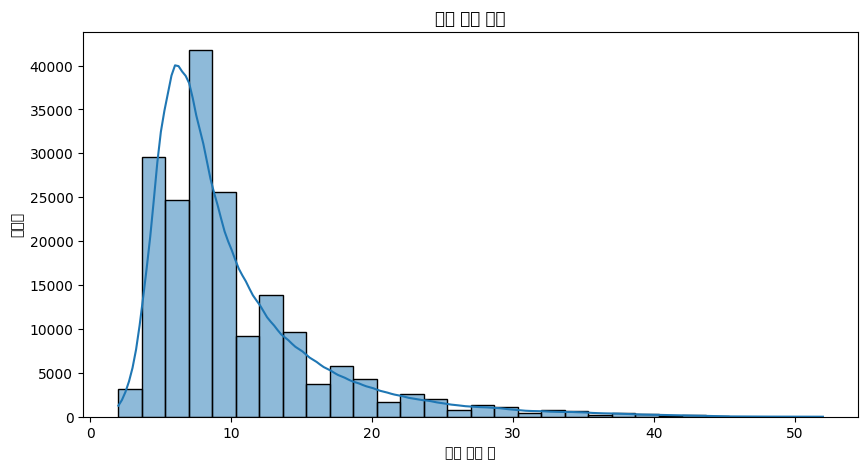


📌 가장 많이 등장하는 단어 50개:
 [('잘', 26817), ('신고', 13114), ('사이즈', 12939), ('것', 12559), ('편하고', 12055), ('신는데', 10525), ('신발', 10322), ('발이', 8648), ('많이', 7432), ('더', 7229), ('샀는데', 6693), ('편해요', 6624), ('살짝', 6383), ('발볼이', 6320), ('발', 6135), ('다', 6029), ('크게', 5927), ('근데', 5892), ('가성비', 5711), ('사이즈는', 5567), ('신기', 5384), ('사이즈가', 5384), ('그냥', 5372), ('신을', 5341), ('편하게', 5330), ('처음', 5324), ('좋은', 5146), ('같습니다', 5112), ('신으면', 5033), ('만족합니다', 4999), ('수', 4986), ('평소', 4917), ('이', 4876), ('신발이', 4751), ('있어서', 4696), ('거', 4583), ('정사이즈', 4507), ('때', 4481), ('오래', 4308), ('발볼', 4166), ('착화감', 4073), ('착화감도', 3853), ('사이즈도', 3734), ('역시', 3590), ('신발은', 3546), ('편해서', 3532), ('가볍고', 3515), ('자주', 3447), ('디자인도', 3432), ('착화감이', 3421)]


/tmp/ipykernel_38224/2937973254.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pyto

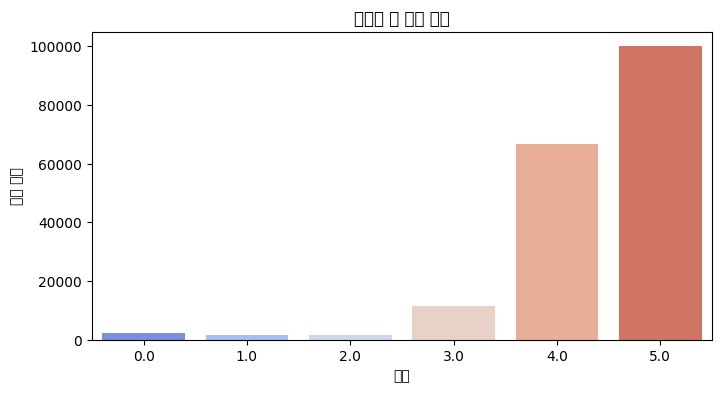


📌 평점별 데이터 개수:
 rating
5.0    100000
4.0     66653
3.0     11610
0.0      2200
1.0      1754
2.0      1698
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 데이터 기본 정보 확인
print("📌 데이터프레임 크기:", df_balanced.shape)
print("\n📌 컬럼별 결측값 개수:\n", df_balanced.isnull().sum())
print("\n📌 데이터 타입 확인:\n", df_balanced.dtypes)

# ==========================
# 1️⃣ 텍스트 길이 분석
# ==========================
df_balanced["review_length"] = df_balanced["cleaned_review"].astype(str).apply(lambda x: len(x.split()))

# 리뷰 길이 기본 통계값
print("\n📌 리뷰 길이 통계값:")
print(df_balanced["review_length"].describe())

# 리뷰 길이 분포 시각화
plt.figure(figsize=(10, 5))
sns.histplot(df_balanced["review_length"], bins=30, kde=True)
plt.xlabel("리뷰 단어 수")
plt.ylabel("빈도수")
plt.title("리뷰 길이 분포")
plt.show()

# ==========================
# 2️⃣ 빈도수 기반 키워드 분석
# ==========================
words = " ".join(df_balanced["cleaned_review"].astype(str)).split()
word_counts = Counter(words)

# 가장 많이 등장하는 단어 50개 출력
common_words = word_counts.most_common(50)
print("\n📌 가장 많이 등장하는 단어 50개:\n", common_words)

# ==========================
# 3️⃣ 평점(rating) 분포 분석
# ==========================
plt.figure(figsize=(8, 4))
sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
plt.xlabel("평점")
plt.ylabel("리뷰 개수")
plt.title("샘플링 후 평점 분포")
plt.show()

print("\n📌 평점별 데이터 개수:\n", df_balanced["rating"].value_counts())


/tmp/ipykernel_38224/2086293214.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pyto

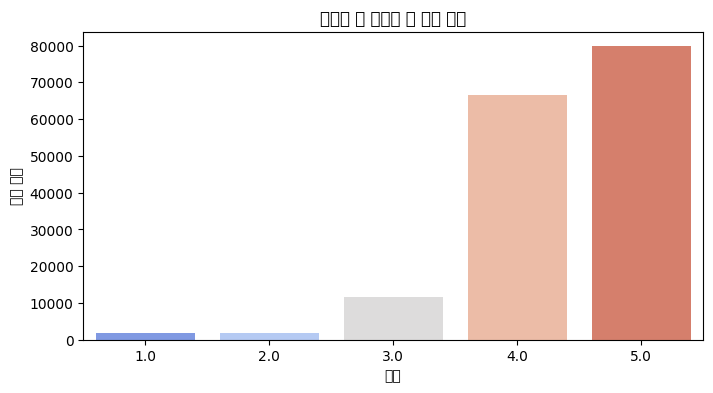

📌 개선 후 데이터 크기: (161289, 9)


In [ ]:
# 이상한 0점 데이터 제거
df_balanced = df_balanced[df_balanced["rating"] != 0]

# 5점 데이터를 80,000개로 줄이기 (더 균형 맞추기)
df_5 = df_balanced[df_balanced["rating"] == 5].sample(n=80000, random_state=42)
df_rest = df_balanced[df_balanced["rating"] < 5]  # 5점 미만 데이터 유지
df_balanced = pd.concat([df_5, df_rest])

# 리뷰 길이 2단어 이상만 유지
df_balanced = df_balanced[df_balanced["review_length"] > 2]

# 불필요한 단어 제거 (stopwords 업데이트)
stopwords.update(["잘", "것", "더", "다", "수", "이"])

# 평점 분포 다시 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
plt.xlabel("평점")
plt.ylabel("리뷰 개수")
plt.title("샘플링 및 필터링 후 평점 분포")
plt.show()

print("개선 후 데이터 크기:", df_balanced.shape)


In [ ]:
df_balanced.head()

,review_id,product_id,rating,review_text,review_date,review_size,review_length,cleaned_review,tokenized_review
489444,65431338,2070763,5.0,가죽이 부들부들해서 착화감이 좋아요\n\n색깔도 맘에 듭니다,2024-10-10,42(260) 구매,5,가죽이 부들부들해서 착화감이 색깔도 듭니다,"['가죽', '부들부들해서', '좋아요', '색깔', '듭니']"
17099,11913341,1092992,5.0,여름에 거의 매일 신고 다녔어요 오래 신어도 편하고 무난해요,2020-09-27,240 구매,8,여름에 매일 신고 다녔어요 오래 신어도 편하고 무난해요,"['여름', '거의', '매일', '신고', '다녔어요', '오래', '신어', '..."
96181,20956603,1494180,5.0,신발 자체가 너무 이쁘고 키높이도 맘에 들어요! :) 자주 신고 다닐 거 같습니다 ㅎㅎ,2021-10-20,260 구매,8,신발 자체가 키높이도 자주 신고 다닐 거 같습니다,"['신발', '자체', '이쁘고', '높이', '들어요', '자주', '신고', '..."
435296,59968738,1798273,5.0,배송이 빠르고 포장 꼼곰합니다.\n발볼 넓은 버전도 나왔으면 좋겠네요,2024-05-27,270 구매,9,배송이 빠르고 포장 꼼곰합니다 발볼 넓은 버전도 나왔으면 좋겠네요,"['배송', '빠르고', '포장', '꼼곰합니', '발볼', '넓은', '버전', ..."
376434,53871258,1635193,5.0,내성발톱 있는데 발볼이 좁지 않아서 편하고 무난해서 좋아요,2023-12-30,270 구매,7,내성발톱 있는데 발볼이 좁지 않아서 편하고 무난해서,"['내성발톱', '있는데', '발볼', '좁지', '않아서', '편하고', '무난'..."


📌 평점별 데이터 개수:
 rating
5.0    79789
4.0    66484
3.0    11572
1.0     1748
2.0     1696
Name: count, dtype: int64


/tmp/ipykernel_38224/2110876092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pyto

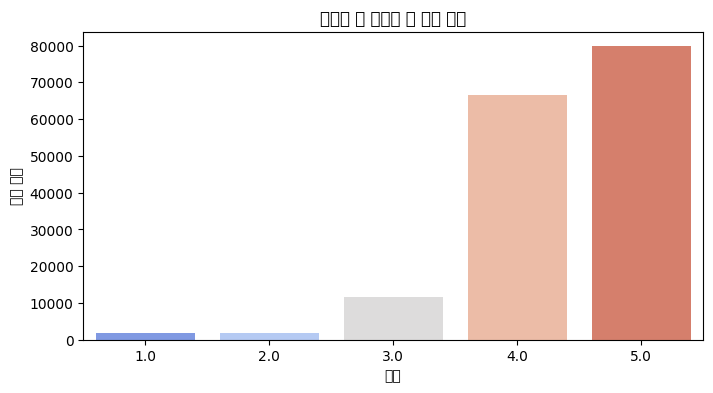

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 평점별 개수 확인
rating_counts = df_balanced["rating"].value_counts()
print("📌 평점별 데이터 개수:\n", rating_counts)

# 평점 분포 시각화
plt.figure(figsize=(8, 4))
sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
plt.xlabel("평점")
plt.ylabel("리뷰 개수")
plt.title("샘플링 및 필터링 후 평점 분포")
plt.show()


In [ ]:
# 평점별 데이터 가져오기
df_4 = df_balanced[df_balanced["rating"] == 4].head(10)
df_3 = df_balanced[df_balanced["rating"] == 3].head(10)
df_2 = df_balanced[df_balanced["rating"] == 2].head(10)
df_1 = df_balanced[df_balanced["rating"] == 1].head(10)

# 데이터 출력
print("\n📌 4점 리뷰 데이터:\n", df_4)
print("\n📌 3점 리뷰 데이터:\n", df_3)
print("\n📌 2점 리뷰 데이터:\n", df_2)
print("\n📌 1점 리뷰 데이터:\n", df_1)



📌 4점 리뷰 데이터:
     review_id  product_id  rating                                 review_text  \
3    10000123     1092992     4.0                   너무 푹신해서 다리가 조금 불편하기도 합니다요   
5    10000542     1258378     4.0  오늘 상품 받았구요. 키높이 슬리퍼인듯. 대체로 만족함. 아주만족은 아니구뇨   
6    10000573     1258378     4.0  오늘 상품받았구요. 쿠션감은 보통이에요. 그리고 키가커보임. 난. 필요없는데   
7    10000602     1354129     4.0        착용감이 편하고 색상이 이뻐요 적당히 키높이 효과도 있구요^^ 굿   
8    10000645     1354129     4.0           착용감이 편하고 색상이 이뻐요 키높이 효과도 있어서 굿 ^^   
26   10002794     1092992     4.0       사진상 살짝 뒤로 신었는데 앞으로 발 넣으면 사이즈 아주 딱 맞아요   
27   10002810     1092992     4.0                   어떤 복장에나 스며드는 능력이 아주 탁월합니다   
29   10002935     1032784     4.0             평소 신발은 270 신고 싸게사서 잘 신고다니고 있습니다   
30   10002980     1092992     4.0    쿠폰에 적립금까지하니까 빅스마일보다 싸게샀네용. 푹신푹신 좋습니다 아주~   
34   10003402     1092992     4.0         폭신폭신 좋아요 발등이 높은편이라 230신는데 240으로 샀어요   

   review_date review_size  review_length  \
3   2020-06-03      280 구매              4   
5  

In [ ]:
# 중복된 리뷰 제거 (review_id 기준)
df_balanced = df_balanced.drop_duplicates(subset=["review_id"], keep="first")

# 중복 제거 후 데이터 크기 확인
print("중복 제거 후 데이터 크기:", df_balanced.shape)

# 중복 제거 확인 (다시 중복 개수 확인)
duplicate_count = df_balanced.duplicated(subset=["review_id"]).sum()
print("남은 중복 데이터 개수:", duplicate_count)


In [ ]:
# 중복 데이터 개수 확인 (review_id 기준)
duplicate_count = df_balanced.duplicated(subset=["review_text"]).sum()

# 중복이 있는 경우, 중복된 데이터 샘플 확인
if duplicate_count > 0:
    duplicate_samples = df_balanced[df_balanced.duplicated(subset=["review_id"], keep=False)].head(10)
    print("중복된 데이터 개수:", duplicate_count)
    print("\n중복된 데이터 샘플:")
    print(duplicate_samples)
else:
    print("중복된 데이터가 없습니다.")


📌 중복된 데이터 개수: 9999

📌 중복된 데이터 샘플:
Empty DataFrame
Columns: [review_id, product_id, rating, review_text, review_date, review_size, review_length, cleaned_review, tokenized_review]
Index: []


In [ ]:
# df_balanced를 CSV 파일로 저장
file_path = "df_balanced.csv"  # 저장할 파일명 설정
df_balanced.to_csv(file_path, index=False, encoding="utf-8-sig")

print(f"df_balanced 데이터가 {file_path} 파일로 저장되었습니다.")


df_balanced 데이터가 df_balanced.csv 파일로 저장되었습니다.


In [ ]:
import pandas as pd

# CSV 파일 로드
file_path = "./df_balanced.csv"
df_balanced = pd.read_csv(file_path)

# 데이터 기본 정보 출력
print(df_balanced.info())
print(df_balanced.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161289 entries, 0 to 161288
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         161289 non-null  int64  
 1   product_id        161289 non-null  int64  
 2   rating            161289 non-null  float64
 3   review_text       161289 non-null  object 
 4   review_date       161289 non-null  object 
 5   review_size       161289 non-null  object 
 6   review_length     161289 non-null  int64  
 7   cleaned_review    161289 non-null  object 
 8   tokenized_review  161289 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 11.1+ MB
None
   review_id  product_id  rating  \
0   65431338     2070763     5.0   
1   11913341     1092992     5.0   
2   20956603     1494180     5.0   
3   59968738     1798273     5.0   
4   53871258     1635193     5.0   

                                        review_text review_date review_size  

/tmp/ipykernel_38224/3467987148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/pytor

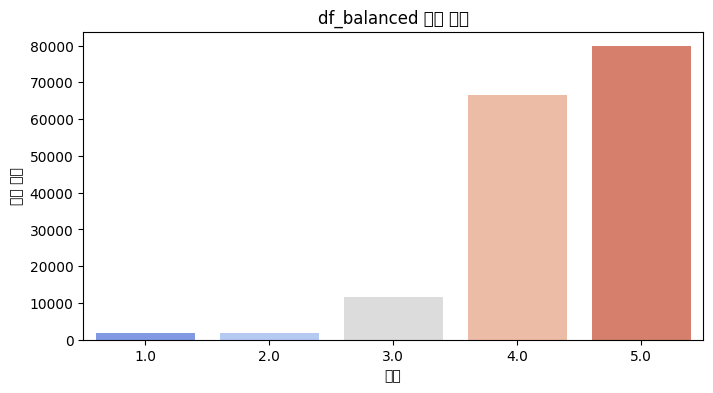

평점별 데이터 개수:
 rating
5.0    79789
4.0    66484
3.0    11572
1.0     1748
2.0     1696
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=df_balanced, x="rating", palette="coolwarm")
plt.xlabel("평점")
plt.ylabel("리뷰 개수")
plt.title("df_balanced 평점 분포")
plt.show()

print("평점별 데이터 개수:\n", df_balanced["rating"].value_counts())


In [ ]:
df_balanced

,review_id,product_id,rating,review_text,review_date,review_size,review_length,cleaned_review,tokenized_review
0,65431338,2070763,5.0,가죽이 부들부들해서 착화감이 좋아요\n\n색깔도 맘에 듭니다,2024-10-10,42(260) 구매,5,가죽이 부들부들해서 착화감이 색깔도 듭니다,"['가죽', '부들부들해서', '좋아요', '색깔', '듭니']"
1,11913341,1092992,5.0,여름에 거의 매일 신고 다녔어요 오래 신어도 편하고 무난해요,2020-09-27,240 구매,8,여름에 매일 신고 다녔어요 오래 신어도 편하고 무난해요,"['여름', '거의', '매일', '신고', '다녔어요', '오래', '신어', '..."
2,20956603,1494180,5.0,신발 자체가 너무 이쁘고 키높이도 맘에 들어요! :) 자주 신고 다닐 거 같습니다 ㅎㅎ,2021-10-20,260 구매,8,신발 자체가 키높이도 자주 신고 다닐 거 같습니다,"['신발', '자체', '이쁘고', '높이', '들어요', '자주', '신고', '..."
3,59968738,1798273,5.0,배송이 빠르고 포장 꼼곰합니다.\n발볼 넓은 버전도 나왔으면 좋겠네요,2024-05-27,270 구매,9,배송이 빠르고 포장 꼼곰합니다 발볼 넓은 버전도 나왔으면 좋겠네요,"['배송', '빠르고', '포장', '꼼곰합니', '발볼', '넓은', '버전', ..."
4,53871258,1635193,5.0,내성발톱 있는데 발볼이 좁지 않아서 편하고 무난해서 좋아요,2023-12-30,270 구매,7,내성발톱 있는데 발볼이 좁지 않아서 편하고 무난해서,"['내성발톱', '있는데', '발볼', '좁지', '않아서', '편하고', '무난'..."
...,...,...,...,...,...,...,...,...,...
161284,9996115,595040,4.0,아주 괜찮은 상품입니다. 브랜드이름을 믿고 구매했는데 만족합니다!,2020-06-03,270 구매,6,괜찮은 상품입니다 브랜드이름을 믿고 구매했는데 만족합니다,"['괜찮은', '상품', '입니다', '브랜드', '이름', '믿고', '구매', ..."
161285,9996185,1128656,4.0,전체적으로 이쁘고 만족스럽네요 오래신으면 발등이 아픈거 빼고는요,2020-06-03,블랙 · 270 구매,6,전체적으로 만족스럽네요 오래신으면 발등이 아픈거 빼고는요,"['전체', '으로', '이쁘고', '만족스럽네요', '오래', '신으면', '발등..."
161286,9996197,1128656,4.0,전체적으로 이쁘고 만족스럽네요 오래신으면 발등이 아픈거 빼고는요,2020-06-03,블랙 · 270 구매,6,전체적으로 만족스럽네요 오래신으면 발등이 아픈거 빼고는요,"['전체', '으로', '이쁘고', '만족스럽네요', '오래', '신으면', '발등..."
161287,9998848,1435428,4.0,수제화라 그런지 질이 좋은것 같다 2년정도 무리없이 신을수 있을 것 같다.,2020-06-03,260 구매,11,수제화라 그런지 질이 좋은것 같다 년정도 무리없이 신을수 있을 것 같다,"['수제', '그런지', '좋은', '정도', '무리', '없이', '신을수', '..."


In [ ]:
import pandas as pd

# 데이터 로드
file_path = "./df_balanced.csv"
df = pd.read_csv(file_path)

# 데이터 크기 확인
print("데이터 크기:", df.shape)

# 컬럼별 결측값 확인
print("\n컬럼별 결측값 개수:")
print(df.isnull().sum())

# 데이터 타입 확인
print("\n데이터 타입:")
print(df.dtypes)


데이터 크기: (161289, 9)

컬럼별 결측값 개수:
review_id           0
product_id          0
rating              0
review_text         0
review_date         0
review_size         0
review_length       0
cleaned_review      0
tokenized_review    0
dtype: int64

데이터 타입:
review_id             int64
product_id            int64
rating              float64
review_text          object
review_date          object
review_size          object
review_length         int64
cleaned_review       object
tokenized_review     object
dtype: object


In [ ]:
# review_text 기준으로 중복 제거 (첫 번째 값 유지)
df = df.drop_duplicates(subset=["review_text"], keep="first")

# 중복 제거 후 데이터 크기 확인
print("📌 중복 제거 후 데이터 크기:", df.shape)

📌 중복 제거 후 데이터 크기: (151290, 9)


In [ ]:
# 리뷰 길이 계산
df["review_length"] = df["cleaned_review"].astype(str).apply(lambda x: len(x.split()))

# 리뷰 길이 통계 확인
print(df["review_length"].describe())

# 너무 짧은 리뷰 (2단어 이하) 제거
df = df[df["review_length"] > 2]

# 너무 긴 리뷰 (50단어 이상) 필터링 (삭제X, 따로 저장)
long_reviews = df[df["review_length"] >= 50]

# 정제된 데이터 크기 확인
print("📌 리뷰 길이 기준으로 정제된 데이터 크기:", df.shape)

count    151290.000000
mean         10.005096
std           6.046576
min           3.000000
25%           6.000000
50%           8.000000
75%          12.000000
max          52.000000
Name: review_length, dtype: float64
📌 리뷰 길이 기준으로 정제된 데이터 크기: (151290, 9)


In [ ]:
# df_balanced를 CSV 파일로 저장
file_path = "review_balanced.csv"  # 저장할 파일명 설정
df.to_csv(file_path, index=False, encoding="utf-8-sig")

print(f"df_balanced 데이터가 {file_path} 파일로 저장되었습니다.")

df_balanced 데이터가 review_balanced.csv 파일로 저장되었습니다.


In [ ]:
# 평점별 개수 확인
rating_counts = df["rating"].value_counts()
print("📌 평점별 데이터 개수:\n", rating_counts)

📌 평점별 데이터 개수:
 rating
5.0    77429
4.0    60204
3.0    10507
1.0     1594
2.0     1556
Name: count, dtype: int64


In [ ]:
categories_expanded = {
    "착용감": [
        "착용", "편안", "불편", "쿠션", "푹신",'폭신', "딱", "아픔",'아픕', "아파","아프",'아플','아픈', "편함", "편해",'편하', "착화", "장시간",'양말 필수','양말은 필수',
         "가볍", "가벼", "무겁","무거", "통풍", "신축", "탄력", "착 감" , '까져','까지', '반창고','밴드','편한','피로','물집','상처','좁아','좁고','좁네','타이트','데일리',
        '포근','느낌','부드','벗겨','따뜻','따듯','길들','길드','까져','까졌','까졋','까진','까지','저려','무리', '착 화','양말','끼는','낍','까지','까졌','까집','라이트'
    ],
    "사이즈": [
        "사이즈", "사 이즈",'사이주', "크","큽", "작", "발 볼", "길이", "정사이즈", "오버", "딱맞다","발볼",'꽉','큰','벗겨','여유','널널','치수','10단위','10 단위','5단위',
        '5 단위',"헐렁", "슬림", "루즈", '210','215','220','225','230','235','240','245','250','255','260','265','270','275','280','285','290','295','300','업','벗겨',
        '여유','발등','끼'
    ],
    "내구성 및 품질": [
        "내구성", "오래", "튼", "질", "마감", "재질", "해짐", "금방", "벗겨짐", "찢어","퀄리티", "박음","본드","냄새",'닳',
        "스크래치", "먼지", "단단", "마모", "시간지남", "늘어", "터짐", "탄탄",'가죽'
    ],
    "디자인": [
        "디자인", "스타일",'예쁨','이쁨',"예쁜",'이쁜',"예뻐",'이뻐',"예쁘",'이쁘','이뻤','예뻤', "멋짐", "심플", "트렌디", "고급", "유행", "감각", "클래식", "어울", "모양","룩",
        "세련", "귀여운", "차분한", "화려함", "깔끔한", "베이직", "유니크", "섹시", "모던", "주얼", '블랙', '화이트', '흰', '검', '색' ,'핏','쉐입','쉐잎','아이보리',
        '코디','외관','미니','색감','튀','컬러','착장','귀엽','귀여','남성','여성','룩','크기','옷','실물','굽','높이','패션','팬츠','다리','바지','길어',
        '앞','뒤','뒷','이쁩','예쁩','광택','멋','포인트','깔끔','아무 옷','아무옷','어떤 옷','어떤옷','무광','유광','정장'
    ],
    "가성비": [
        "가성비","가성 비", "가격대비", "비싼","비싸", "저렴", "할인", "가격", "돈", "합리적", "질 대비", '블프','세일','입문',
        "싼", "싸게", "싸네", "비싼", "가격만족", "가격적당", "가격부담", "경제적", "가격높음", "퀄리티대비", "가격메리트", "아깝다", "아까운",'득템'
    ],
    "배송 및 포장 및 응대": [
        "배송", "빠름", "느림", "포장", "박스", "찢어짐", "배송", "파손", "안전포장", "택배", '도착','출발','과정',
        "지연", "빠른배송", "포장", "배송빠름", "배송만족", "택배기사", "빠른도착", "파손됨",'불량','응대','친절', '느려', '늦다', '늦어'
    ]
}

In [ ]:
import pandas as pd

# 데이터 로드
file_path = "./review_balanced.csv"
df = pd.read_csv(file_path)

In [ ]:
def categorize_review(text, categories):
    matched_categories = []
    for category, keywords in categories.items():
        if any(keyword in text for keyword in keywords):
            matched_categories.append(category)
    return matched_categories if matched_categories else ["기타"]

In [ ]:
df["categories"] = df["cleaned_review"].astype(str).apply(lambda x: categorize_review(x, categories_expanded))

In [ ]:
category_counts = df["categories"].explode().value_counts()

In [ ]:
category_counts

categories
착용감             86853
디자인             68634
사이즈             56655
가성비             28688
내구성 및 품질        21226
기타               9687
배송 및 포장 및 응대     8576
Name: count, dtype: int64

In [ ]:
# df_balanced를 CSV 파일로 저장
file_path = "review_balanced_v2.csv"  # 저장할 파일명 설정
df.to_csv(file_path, index=False, encoding="utf-8-sig")

print(f"df_balanced 데이터가 {file_path} 파일로 저장되었습니다.")

df_balanced 데이터가 review_balanced_v2.csv 파일로 저장되었습니다.


In [ ]:
import pandas as pd

# 데이터 로드
file_path = "./review_balanced_v2.csv"
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd
import re

# ✅ 데이터 로드
file_path = "./review_balanced_v2.csv"
df = pd.read_csv(file_path)

# ✅ 기존 stopwords 업데이트
stopwords = set([
    "잘", "것", "더", "다", "수", "이", "때", "근데", "첫", "이거",
    "있습니다", "같습니다", "있어요", "합니다", "거", "추천합니다", "감사합니다",
    "구매", "우포스", "신발", "첼시부츠", "쪼리", "샀어요", "샀는데", "구매했는데", "추천", "선물로",
    "합니다", "믿고", "좋아요", "같아요", "정말", "최고"
])

# ✅ **불용어 및 의미 없는 단어 제거 함수**
def clean_review(text, stopwords):
    text = str(text)  # 혹시라도 NaN 값이 있으면 문자열 변환
    text = re.sub(r"[^\w\s]", "", text)  # 특수문자 제거
    words = text.split()  # 단어 단위로 나누기
    cleaned_words = [word for word in words if word not in stopwords]  # 불용어 제거
    return " ".join(cleaned_words)  # 다시 합쳐서 반환

# ✅ 불용어 적용하여 cleaned_review 정제
df["cleaned_review"] = df["cleaned_review"].apply(lambda x: clean_review(x, stopwords))

# ✅ 적용 후 확인
print("📌 불용어 적용 후 예제 데이터")
print(df[["cleaned_review"]].head(10))

# # ✅ 최종 데이터 저장
# output_file = "/mnt/data/review_balanced_v3.csv"
# df.to_csv(output_file, index=False)
# print(f"✅ 불용어 적용 후 데이터 저장 완료: {output_file}")


📌 불용어 적용 후 예제 데이터
                                      cleaned_review
0                            가죽이 부들부들해서 착화감이 색깔도 듭니다
1                     여름에 매일 신고 다녔어요 오래 신어도 편하고 무난해요
2                                  자체가 키높이도 자주 신고 다닐
3               배송이 빠르고 포장 꼼곰합니다 발볼 넓은 버전도 나왔으면 좋겠네요
4                       내성발톱 있는데 발볼이 좁지 않아서 편하고 무난해서
5                                     핏좋고 재질좋고 부드러워요
6       무신사 스탠다드에서 레더 스니커즈 화이트를 구매해서 신고 다니고 재구매 했습니다
7  저는 한사이즈 업했습니다 남친도 업하는게 맞더라구요 받아서 신어본 결과로는 편해요 ...
8                     우포스는 항상 삽미다 편한 발을 위한 최고의 제품입니다
9                       오래신으면 발바닥이 아프긴 한데 가성비로 추천드려요


In [ ]:
import pandas as pd

# 데이터 로드
file_path = "./review_balanced_v2_cleaned.csv"
df = pd.read_csv(file_path)

In [ ]:
# df_balanced를 CSV 파일로 저장
file_path = "review_balanced_v2.csv"  # 저장할 파일명 설정
df.to_csv(file_path, index=False, encoding="utf-8-sig")

print(f"df_balanced 데이터가 {file_path} 파일로 저장되었습니다.")

In [ ]:
topic_columns = ["착용감", "디자인", "사이즈", "내구성 및 품질", "배송 및 포장 및 응대", "가성비"]

# 오버샘플링 (가장 많은 클래스 수에 맞추기)
df_oversampled = resample_topics_custom(df, topic_cols=topic_columns, method='over', base='max')

# 언더샘플링 (가장 적은 클래스 수에 맞추기)
df_undersampled = resample_topics_custom(df, topic_cols=topic_columns, method='under', base='min')

In [ ]:
df = df.dropna(subset=["review_text"])                 # 결측치 제거
df = df.drop_duplicates(subset=["review_id"])          # 중복 제거
df["review_length"] = df["review_text"].apply(lambda x: len(str(x)))
df = df[(df["review_length"] >= 10) & (df["review_length"] <= 500)]  # 길이 필터링

In [ ]:
def clean_text(text):
    text = re.sub(r"[^가-힣\\s]", "", text)           # 특수문자 제거
    text = re.sub(r"\\s+", " ", text).strip()         # 공백 정리
    text = re.sub(r"(.)\\1{2,}", r"\\1", text)        # 반복 문자 제거
    return text

df["cleaned_review"] = df["review_text"].apply(clean_text)

In [ ]:
tokenizer = BertTokenizer.from_pretrained("klue/bert-base")

def tokenize_function(texts, batch_size=5000):
    encodings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encodings.append(tokenizer(batch, padding="max_length", truncation=True, max_length=128, return_tensors="pt"))
    return BatchEncoding({k: torch.cat([e[k] for e in encodings]) for k in encodings[0]})